<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_5/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
!pip install --upgrade augly -q
!pip install nlpaug -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.2 MB/s eta 0:00:00


In [4]:
from PIL import Image
import os
import random
import augly.image as imaugs

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/cats') if f.endswith('.jpg')]
images = []
counter=0
cats_train=[]
cats_test=[]

for i in image_files:
    img_path = os.path.join('/content/drive/MyDrive/cats', i)
    img = Image.open(img_path)
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        cats_train.append(img_array)
    else:
        img_array=np.array(img)
        cats_test.append(img_array)


In [38]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/dogs') if f.endswith('.jpg')]
images = []
counter=0
dogs_train=[]
dogs_test=[]

for i in image_files:
    img_path = os.path.join('/content/drive/MyDrive/dogs', i)
    img = np.array(Image.open(img_path))
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        dogs_train.append(img_array)
    else:
        img_array=np.array(img)
        dogs_test.append(img_array)

In [39]:
len(dogs_train),len(dogs_test),len(cats_train),len(cats_test)

(56, 14, 56, 14)

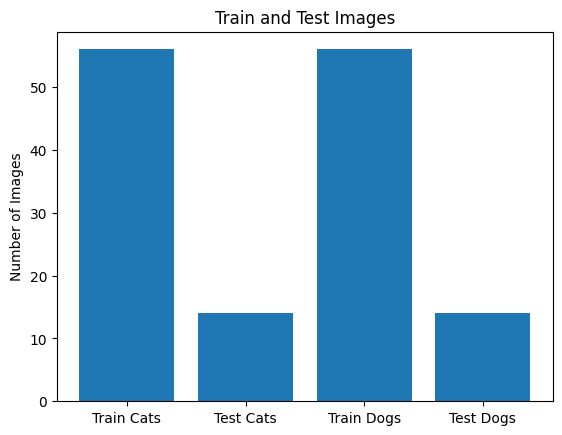

In [40]:
# plot the bar graph for the counts of train and test cats and dogs images

objects = ('Train Cats', 'Test Cats', 'Train Dogs', 'Test Dogs')
y_pos = np.arange(len(objects))
performance = [len(cats_train),len(cats_test),len(dogs_train),len(dogs_test)]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Train and Test Images')
plt.show()


In [90]:
def augment_images(images_path, output_path):
    # Delete all existing images in the output directory before augmentation
    if os.path.exists(output_path):
        for file in os.listdir(output_path):
            file_path = os.path.join(output_path, file)
            if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.png', '.jpeg')):
                os.remove(file_path)
        print(f"Cleared existing images in {output_path}")

    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # List of augmentation functions
    augmentation_ops = [
        imaugs.blur,
        imaugs.crop,
        imaugs.rotate,
        imaugs.scale,
        imaugs.random_noise,
        imaugs.grayscale,
        imaugs.opacity,
        imaugs.brightness,
        imaugs.contrast,
        imaugs.pixelization,
        imaugs.pad_square,
        imaugs.sharpen,
        imaugs.skew,
        imaugs.scale,
    ]

    # Get list of image files and sort them to ensure consistency
    image_files = sorted([f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))])

    # Process only the first 56 images
    for idx, filename in enumerate(image_files[:56]):  # Limiting to 56 images
        input_file = os.path.join(images_path, filename)

        # Load image using PIL
        try:
            image = Image.open(input_file)
        except Exception as e:
            print(f"Skipping {filename}: {e}")
            continue

        # Perform augmentation twice for each image
        for i in range(2):
            ops = random.sample(augmentation_ops, 3)  # Select 3 random augmentations
            print(f"Applying {', '.join([op.__name__ for op in ops])} to {filename} (Augment {i+1})")

            # Apply augmentations sequentially
            augmented_image = image
            l=[]
            for op in ops:
                try:
                    augmented_image = op(augmented_image)  # Apply augmentation
                    l.append(augmented_image)
                except Exception as e:
                    print(f"Error applying {op.__name__} to {filename}: {e}")
                    continue  # Skip to next operation if one fails


            # Save final augmented image with unique identifier
            output_file = os.path.join(output_path, f"aug_{i+1}_{filename}")
            augmented_image.save(output_file)

    print("done")


In [91]:
augment_images('/content/drive/MyDrive/cats', '/content/drive/MyDrive/dataset_augmented/cats')

Cleared existing images in /content/drive/MyDrive/dataset_augmented/cats
Applying blur, contrast, sharpen to cat_1.jpg (Augment 1)
Applying grayscale, opacity, pad_square to cat_1.jpg (Augment 2)
Applying sharpen, scale, crop to cat_106.jpg (Augment 1)
Applying blur, scale, sharpen to cat_106.jpg (Augment 2)
Applying contrast, scale, brightness to cat_109.jpg (Augment 1)
Applying random_noise, pixelization, scale to cat_109.jpg (Augment 2)
Applying sharpen, scale, blur to cat_113.jpg (Augment 1)
Applying grayscale, opacity, scale to cat_113.jpg (Augment 2)
Applying crop, pixelization, blur to cat_114.jpg (Augment 1)
Applying opacity, scale, random_noise to cat_114.jpg (Augment 2)
Applying random_noise, grayscale, pixelization to cat_116.jpg (Augment 1)
Applying skew, pad_square, rotate to cat_116.jpg (Augment 2)
Applying contrast, blur, crop to cat_118.jpg (Augment 1)
Applying blur, sharpen, rotate to cat_118.jpg (Augment 2)
Applying crop, random_noise, pixelization to cat_119.jpg (Aug

In [92]:
folder_path = "/content/drive/MyDrive/dataset_augmented/cats"

# Get all image files (JPG, PNG, etc.)
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Print image file names
print("Found images:", image_files)


Found images: ['aug_1_cat_1.jpg', 'aug_2_cat_1.jpg', 'aug_1_cat_106.jpg', 'aug_2_cat_106.jpg', 'aug_1_cat_109.jpg', 'aug_2_cat_109.jpg', 'aug_1_cat_113.jpg', 'aug_2_cat_113.jpg', 'aug_1_cat_114.jpg', 'aug_2_cat_114.jpg', 'aug_1_cat_116.jpg', 'aug_2_cat_116.jpg', 'aug_1_cat_118.jpg', 'aug_2_cat_118.jpg', 'aug_1_cat_119.jpg', 'aug_2_cat_119.jpg', 'aug_1_cat_124.jpg', 'aug_2_cat_124.jpg', 'aug_1_cat_140.jpg', 'aug_2_cat_140.jpg', 'aug_1_cat_147.jpg', 'aug_2_cat_147.jpg', 'aug_1_cat_156.jpg', 'aug_2_cat_156.jpg', 'aug_1_cat_158.jpg', 'aug_2_cat_158.jpg', 'aug_1_cat_162.jpg', 'aug_2_cat_162.jpg', 'aug_1_cat_18.jpg', 'aug_2_cat_18.jpg', 'aug_1_cat_190.jpg', 'aug_2_cat_190.jpg', 'aug_1_cat_203.jpg', 'aug_2_cat_203.jpg', 'aug_1_cat_223.jpg', 'aug_2_cat_223.jpg', 'aug_1_cat_234.jpg', 'aug_2_cat_234.jpg', 'aug_1_cat_244.jpg', 'aug_2_cat_244.jpg', 'aug_1_cat_251.jpg', 'aug_2_cat_251.jpg', 'aug_1_cat_255.jpg', 'aug_2_cat_255.jpg', 'aug_1_cat_268.jpg', 'aug_2_cat_268.jpg', 'aug_1_cat_279.jpg', 'aug

In [93]:
len(image_files)

112

In [94]:
augment_images('/content/drive/MyDrive/dogs', '/content/drive/MyDrive/dataset_augmented/dogs')

Cleared existing images in /content/drive/MyDrive/dataset_augmented/dogs
Applying random_noise, scale, sharpen to dog_114.jpg (Augment 1)
Applying skew, pad_square, brightness to dog_114.jpg (Augment 2)
Applying crop, scale, sharpen to dog_123.jpg (Augment 1)
Applying pad_square, crop, random_noise to dog_123.jpg (Augment 2)
Applying scale, opacity, sharpen to dog_124.jpg (Augment 1)
Applying crop, pixelization, opacity to dog_124.jpg (Augment 2)
Applying opacity, brightness, contrast to dog_130.jpg (Augment 1)
Applying scale, pad_square, grayscale to dog_130.jpg (Augment 2)
Applying random_noise, crop, grayscale to dog_141.jpg (Augment 1)
Applying skew, brightness, scale to dog_141.jpg (Augment 2)
Applying skew, blur, contrast to dog_142.jpg (Augment 1)
Applying random_noise, scale, scale to dog_142.jpg (Augment 2)
Applying pad_square, scale, contrast to dog_147.jpg (Augment 1)
Applying opacity, pad_square, brightness to dog_147.jpg (Augment 2)
Applying contrast, rotate, pixelization 

In [95]:
folder_path = "/content/drive/MyDrive/dataset_augmented/dogs"

# Get all image files (JPG, PNG, etc.)
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Print image file names
print("Found images:", image_files)


Found images: ['aug_1_dog_114.jpg', 'aug_2_dog_114.jpg', 'aug_1_dog_123.jpg', 'aug_2_dog_123.jpg', 'aug_1_dog_124.jpg', 'aug_2_dog_124.jpg', 'aug_1_dog_130.jpg', 'aug_2_dog_130.jpg', 'aug_1_dog_141.jpg', 'aug_2_dog_141.jpg', 'aug_1_dog_142.jpg', 'aug_2_dog_142.jpg', 'aug_1_dog_147.jpg', 'aug_2_dog_147.jpg', 'aug_1_dog_150.jpg', 'aug_2_dog_150.jpg', 'aug_1_dog_155.jpg', 'aug_2_dog_155.jpg', 'aug_1_dog_159.jpg', 'aug_2_dog_159.jpg', 'aug_1_dog_168.jpg', 'aug_2_dog_168.jpg', 'aug_1_dog_173.jpg', 'aug_2_dog_173.jpg', 'aug_1_dog_177.jpg', 'aug_2_dog_177.jpg', 'aug_1_dog_181.jpg', 'aug_2_dog_181.jpg', 'aug_1_dog_191.jpg', 'aug_2_dog_191.jpg', 'aug_1_dog_194.jpg', 'aug_2_dog_194.jpg', 'aug_1_dog_196.jpg', 'aug_2_dog_196.jpg', 'aug_1_dog_197.jpg', 'aug_2_dog_197.jpg', 'aug_1_dog_211.jpg', 'aug_2_dog_211.jpg', 'aug_1_dog_213.jpg', 'aug_2_dog_213.jpg', 'aug_1_dog_219.jpg', 'aug_2_dog_219.jpg', 'aug_1_dog_227.jpg', 'aug_2_dog_227.jpg', 'aug_1_dog_229.jpg', 'aug_2_dog_229.jpg', 'aug_1_dog_236.jpg'

In [96]:
len(image_files)

112